In [1]:
import matplotlib.pyplot as plt #Para visualizacao dos dados e do erro
import numpy as np #Biblioteca de manipulacao de arrays Numpy
from matplotlib.colors import ListedColormap #Lista de cores para plotagens
import pandas as pd

In [2]:
### Carregar iris dataset
df = pd.read_csv('Dados_Treinamento_Sinal.csv',header=None)
df.head()

,0,1,2,3,4
0,0.4329,-1.3719,0.7022,-0.8535,1.0
1,0.3024,0.2286,0.8630,2.7909,-1.0
2,0.1349,-0.6445,1.0530,0.5687,-1.0
3,0.3374,-1.7163,0.3670,-0.6283,-1.0
4,1.1434,-0.0485,0.6637,1.2606,1.0


In [3]:
X = df.iloc[0:35,[0,1,2,3]].values
y = df.iloc[0:35,4].values

In [4]:
print(X)
print("Y:", y)

## Assumindo que Setosa(0) seja -1 e Versicolor = 1

## Plotar o grafico
## vermelhos ----> Classe2 (-1)
## azuis ----> Classe1 (1)

[[ 4.3290e-01 -1.3719e+00  7.0220e-01 -8.5350e-01]
 [ 3.0240e-01  2.2860e-01  8.6300e-01  2.7909e+00]
 [ 1.3490e-01 -6.4450e-01  1.0530e+00  5.6870e-01]
 [ 3.3740e-01 -1.7163e+00  3.6700e-01 -6.2830e-01]
 [ 1.1434e+00 -4.8500e-02  6.6370e-01  1.2606e+00]
 [ 1.3749e+00 -5.0710e-01  4.4640e-01  1.3009e+00]
 [ 7.2210e-01 -7.5870e-01  7.6810e-01 -5.5920e-01]
 [ 4.4030e-01 -8.0720e-01  5.1540e-01 -3.1290e-01]
 [-5.2310e-01  3.5480e-01  2.5380e-01  1.5776e+00]
 [ 3.2550e-01 -2.0000e+00  7.1120e-01 -1.1209e+00]
 [ 5.8240e-01  1.3915e+00 -2.2910e-01  4.1735e+00]
 [ 1.3400e-01  6.0810e-01  4.4500e-01  3.2230e+00]
 [ 1.4800e-01 -2.9880e-01  4.7780e-01  8.6490e-01]
 [ 7.3590e-01  1.8690e-01 -8.7200e-02  2.3584e+00]
 [ 7.1150e-01 -1.1469e+00  3.3940e-01  9.5730e-01]
 [ 8.2510e-01 -1.2840e+00  8.4520e-01  1.2382e+00]
 [ 1.5690e-01  3.7120e-01  8.8250e-01  1.7633e+00]
 [ 3.3000e-03  6.8350e-01  5.3890e-01  2.8249e+00]
 [ 4.2430e-01  8.3130e-01  2.6340e-01  3.5855e+00]
 [ 1.0490e+00  1.3260e-01  9.13

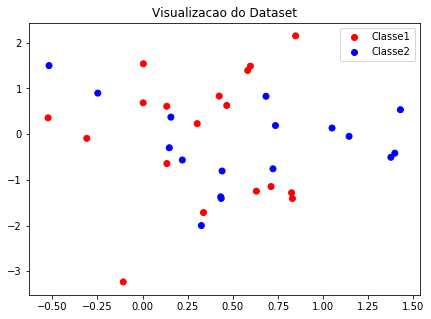

In [5]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
plt.scatter(None, None, color = 'r', label='Classe1')
plt.scatter(None, None, color = 'b', label='Classe2')
plt.legend()
plt.title('Visualizacao do Dataset')
plt.show()

In [6]:
###Construindo Adaline
class Adaline(object):
    def __init__(self, eta = 0.001, epoch = 100):
        self.eta = eta
        self.epoch = epoch

    def fit(self, X, y):
        np.random.seed(16)
        self.weight_ = np.random.uniform(-1, 1, X.shape[1] + 1)
        self.error_ = []
        
        cost = 0
        for _ in range(self.epoch):
            
            output = self.activation_function(X)
            error = y - output
            
            self.weight_[0] += self.eta * sum(error)
            self.weight_[1:] += self.eta * X.T.dot(error)
            
            cost = 1./2 * sum((error**2))
            self.error_.append(cost)
            
        return self

    def net_input(self, X):
        """Calculo da entrada z"""
        return np.dot(X, self.weight_[1:]) + self.weight_[0]
    def activation_function(self, X):
        """Calculo da saida da funcao g(z)"""
        return self.net_input(X)
    def predict(self, X):
        """Retornar valores binaros 0 ou 1"""
        return np.where(self.activation_function(X) >= 0.0, 1, -1)

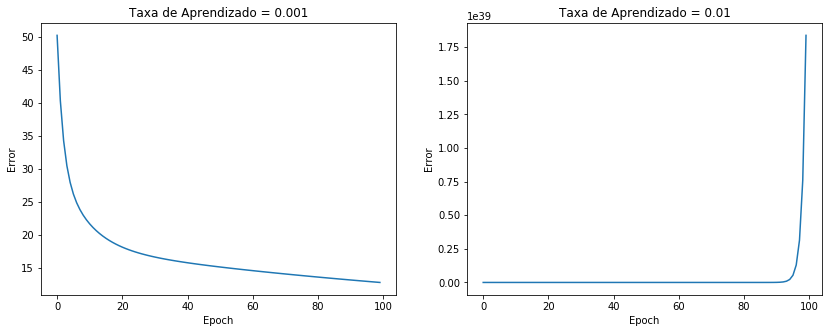

In [7]:
###Plotando erros apos 100 epocas
names = ['Taxa de Aprendizado = 0.001', 'Taxa de Aprendizado = 0.01']
classifiers = [Adaline(), Adaline(eta = 0.01)]
step = 1
plt.figure(figsize=(14,5))
for name, classifier in zip(names, classifiers):
    ax = plt.subplot(1, 2, step)
    clf = classifier.fit(X, y)
    ax.plot(range(len(clf.error_)), clf.error_)
    ax.set_ylabel('Error')
    ax.set_xlabel('Epoch')
    ax.set_title(name)

    step += 1

plt.show()

In [8]:
### Plotando as fronteiras de decisao com Adaline
clf = Adaline()
clf.fit(X, y)

In [9]:
A = [0.4329,-1.3719,0.7022,-0.8535] # Classe 1
B = [0.3024,0.2286,0.8630,2.7909] #Classe -1

In [10]:
print (clf.predict(A))

print (clf.predict(B))

1
-1
